# 3-D Ising Model : Hysteresis

We will investigate the phenomena of hysteresis in 3-d Ising model with Monte Carlo methods.

In [1]:
! swig -c++ -python swig/ising3d.i
! python swig/setup_ising3d.py build_ext --inplace

running build_ext
building '_ising3d' extension
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.7m -c swig/ising3d_wrap.cxx -o build/temp.linux-x86_64-3.7/swig/ising3d_wrap.o -I./ -std=c++11 -O3
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.7m -c ising3d.cpp -o build/temp.linux-x86_64-3.7/ising3d.o -I./ -std=c++11 -O3
x86_64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fstack-protector-strong -Wformat -Werro

In [2]:
import sys
import os
sys.path.append( os.path.abspath("swig") )
import ising3d
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

## Run Simulations for various Magnetic Field  
We consider $H$ as thermodynamic variable keeping $T$ as constant at $T<T_c$ , $T=T_c$ and $T>T_c$ where the $T_c = 4.5$

### $T < T_C$

In [4]:
L = 10
J = 1.0
T = 1.0
H = -5.0
MCSteps = 10000

eAvgVal = []
mAvgVal = []
i = ising3d.Ising(J, L, T, 0.0)
Hvals = np.arange(-3.6,3.65,0.05)
Hvals = np.append(Hvals,Hvals[::-1])

for H in Hvals:
    i.set_H(H)
    i.compute_boltzmann_factors()
    i.reset_averages()
    i.run(MCSteps)
    mvals = i.get_mvals()
    eAvgVal.append( i.get_eAvg() )
    mAvgVal.append( i.get_mAvg() )
#     print(i.get_T(),i.get_H(), i.get_eAvg() , i.get_mAvg())
    



In [5]:
nn = len(Hvals)
H_up1 = Hvals[0:int(nn/2)]
H_dn1 = Hvals[int(nn/2)+1:nn]
M_up1 = mAvgVal[0:int(nn/2)]
M_dn1 = mAvgVal[int(nn/2)+1:nn]
E_up1 = eAvgVal[0:int(nn/2)]
E_dn1 = eAvgVal[int(nn/2)+1:nn]

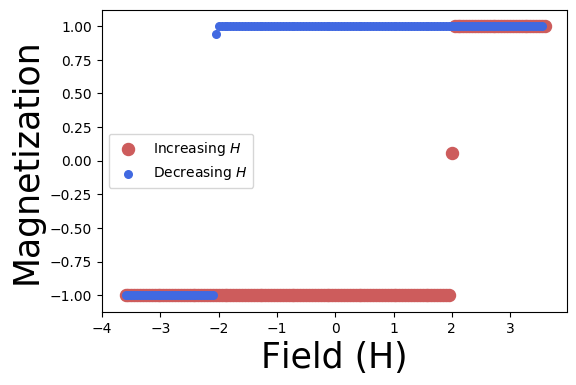

In [6]:
# plt.figure(figsize=(9,6))
plt.scatter(H_up1, M_up1 , c= 'IndianRed', s= 75,marker='o', label='Increasing $H$')
plt.scatter(H_dn1, M_dn1 , c= 'RoyalBlue', s= 30,marker='o', label='Decreasing $H$')
plt.legend()
plt.xlabel("Field (H)", fontsize=25);
plt.ylabel('Magnetization', fontsize=25);
# plt.savefig("paperdata/L_20_MvH_T>Tc.pdf")
plt.show()

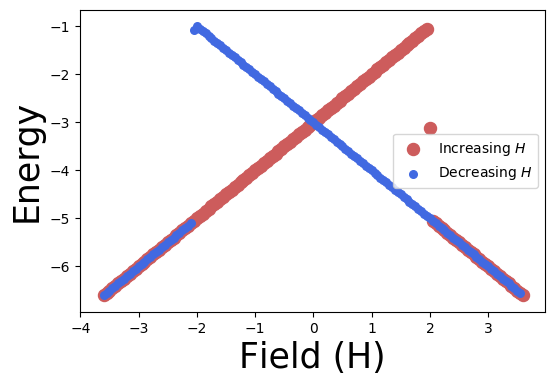

In [7]:
#plt.figure(figsize=(9,6))
plt.scatter(H_up1, E_up1 , c= 'IndianRed', s= 75,marker='o', label='Increasing $H$')
plt.scatter(H_dn1, E_dn1 , c= 'RoyalBlue', s= 30,marker='o', label='Decreasing $H$')
plt.legend()
plt.xlabel("Field (H)", fontsize=25)
plt.ylabel("Energy", fontsize=25)
# plt.savefig("paperdata/L_20_EvH_T>Tc.pdf")
plt.show()

In [8]:
def find_Der(yvals, xvals):
    ''' f     : name of function to be differentiated
        x     : the point at which df/dx is required
        h     : step size
    '''
    
    nn = len(yvals)
    dfdx = np.zeros(nn)
    #for i in range(2,nn-2):
        #dfdx[i+2] = ( yvals[i-2] - 8*yvals[i-1] + 8*yvals[i+1] - yvals[i+2]) / (12*(xvals[i+1] - xvals[i]) )
    for i in range(0,nn-1):    
        dfdx [i+1] = (yvals[i+1] -yvals[i])/(xvals[i+1] - xvals[i])
    return dfdx



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


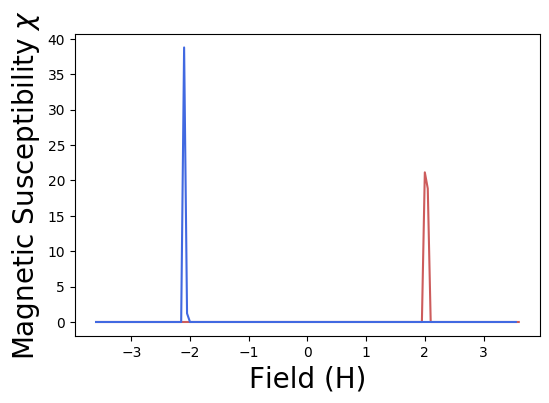

In [9]:
# plt.figure(figsize=(6,4))
dMdH1 = find_Der(mAvgVal, Hvals)
# plt.scatter(H_up, dMdH[0:int(nn/2)] , c= 'red', s= 1.0)
plt.plot(H_up1, dMdH1[0:int(nn/2)], c= 'IndianRed')
plt.plot(H_dn1, dMdH1[int(nn/2)+1:nn], c = 'RoyalBlue')
plt.xlabel("Field (H)", fontsize=20)
plt.ylabel("Susceptibility $\chi$", fontsize=20)
plt.savefig("paperdata/ChivH_T<Tc.pdf")
plt.show()

### $T = T_C$ 

In [10]:
L = 10
J = 1.0
T = 4.5
H = -5.0
MCSteps = 10000

eAvgVal = []
mAvgVal = []
i = ising3d.Ising(J, L, T, 0.0)
Hvals = np.arange(-3.6,3.65,0.05)
Hvals = np.append(Hvals,Hvals[::-1])

for H in Hvals:
    i.set_H(H)
    i.compute_boltzmann_factors()
    i.reset_averages()
    i.run(MCSteps)
    mvals = i.get_mvals()
    eAvgVal.append( i.get_eAvg() )
    mAvgVal.append( i.get_mAvg() )
#     print(i.get_T(),i.get_H(), i.get_eAvg() , i.get_mAvg())
    


In [11]:
nn = len(Hvals)
H_up2 = Hvals[0:int(nn/2)]
H_dn2 = Hvals[int(nn/2)+1:nn]
M_up2 = mAvgVal[0:int(nn/2)]
M_dn2 = mAvgVal[int(nn/2)+1:nn]
E_up2 = eAvgVal[0:int(nn/2)]
E_dn2 = eAvgVal[int(nn/2)+1:nn]

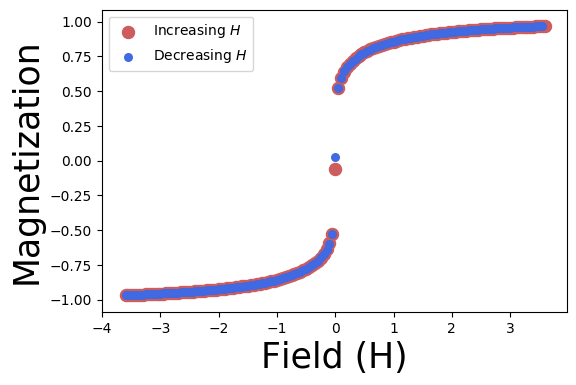

In [12]:
# plt.figure(figsize=(9,6))
plt.scatter(H_up2, M_up2 , c= 'IndianRed', s= 75,marker='o', label='Increasing $H$')
plt.scatter(H_dn2, M_dn2 , c= 'RoyalBlue', s= 30,marker='o', label='Decreasing $H$')
plt.legend()

plt.xlabel("Field (H)", fontsize=25);
plt.ylabel('Magnetization', fontsize=25);

# plt.savefig("paperdata/L_20_MvH_T>Tc.pdf")
# plt.show()

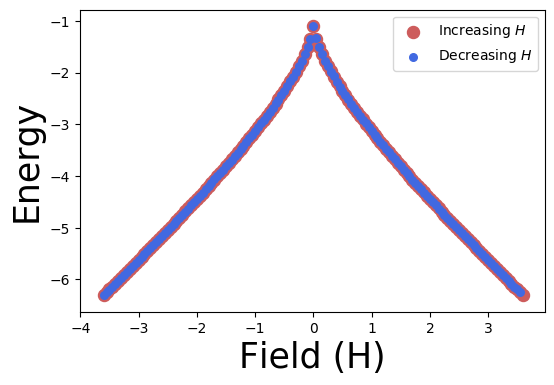

In [13]:
# plt.figure(figsize=(9,6))
plt.scatter(H_up2, E_up2 , c= 'IndianRed', s= 75,marker='o', label='Increasing $H$')
plt.scatter(H_dn2, E_dn2 , c= 'RoyalBlue', s= 30,marker='o', label='Decreasing $H$')
plt.legend()
plt.xlabel("Field (H)", fontsize=25)
plt.ylabel("Energy", fontsize=25)
# plt.savefig("paperdata/L_20_EvH_T>Tc.pdf")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


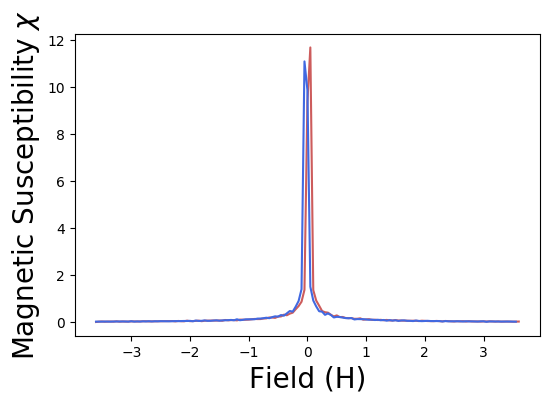

In [14]:
dMdH2 = find_Der(mAvgVal, Hvals)
plt.plot(H_up2, dMdH2[0:int(nn/2)], c= 'IndianRed')
plt.plot(H_dn2, dMdH2[int(nn/2)+1:nn], c = 'RoyalBlue')
plt.xlabel("Field (H)", fontsize=20)
plt.ylabel("Susceptibility $\chi$", fontsize=20)
plt.savefig("paperdata/L_20_ChivH_T=Tc.pdf")
plt.show()

### $T>T_C$

In [15]:
L = 10
J = 1.0
T = 6.0
H = -5.0
MCSteps = 10000

eAvgVal = []
mAvgVal = []
i = ising3d.Ising(J, L, T, 0.0)
Hvals = np.arange(-3.6,3.65,0.05)
Hvals = np.append(Hvals,Hvals[::-1])

for H in Hvals:
    i.set_H(H)
    i.compute_boltzmann_factors()
    i.reset_averages()
    i.run(MCSteps)
    mvals = i.get_mvals()
    eAvgVal.append( i.get_eAvg() )
    mAvgVal.append( i.get_mAvg() )
#     print(i.get_T(),i.get_H(), i.get_eAvg() , i.get_mAvg())
    



In [16]:
nn = len(Hvals)
H_up3 = Hvals[0:int(nn/2)]
H_dn3 = Hvals[int(nn/2)+1:nn]
M_up3 = mAvgVal[0:int(nn/2)]
M_dn3 = mAvgVal[int(nn/2)+1:nn]
E_up3 = eAvgVal[0:int(nn/2)]
E_dn3 = eAvgVal[int(nn/2)+1:nn]

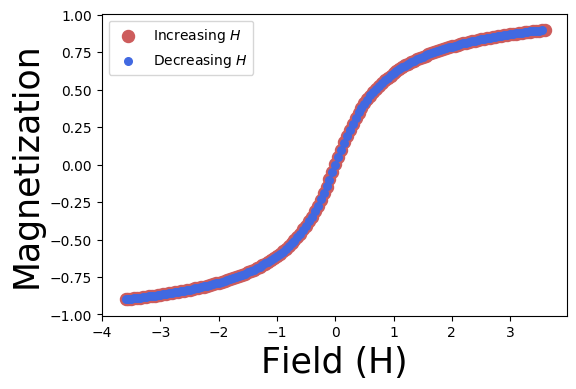

In [17]:
#plt.figure(figsize=(9,6))
plt.scatter(H_up3, M_up3 , c= 'IndianRed', s= 75,marker='o', label='Increasing $H$')
plt.scatter(H_dn3, M_dn3 , c= 'RoyalBlue', s= 30,marker='o', label='Decreasing $H$')
plt.legend()

plt.xlabel("Field (H)", fontsize=25);
plt.ylabel('Magnetization', fontsize=25);

# plt.savefig("paperdata/L_20_MvH_T>Tc.pdf")
plt.show()

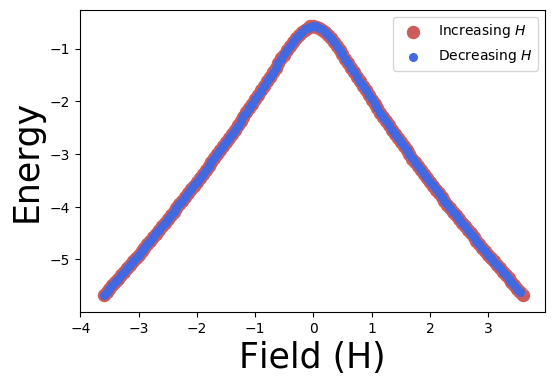

In [18]:
# plt.figure(figsize=(9,6))
plt.scatter(H_up3, E_up3 , c= 'IndianRed', s= 75,marker='o', label='Increasing $H$')
plt.scatter(H_dn3, E_dn3 , c= 'RoyalBlue', s= 30,marker='o', label='Decreasing $H$')
plt.legend()
plt.xlabel("Field (H)", fontsize=25)
plt.ylabel("Energy", fontsize=25)
# plt.savefig("paperdata/L_20_EvH_T>Tc.pdf")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


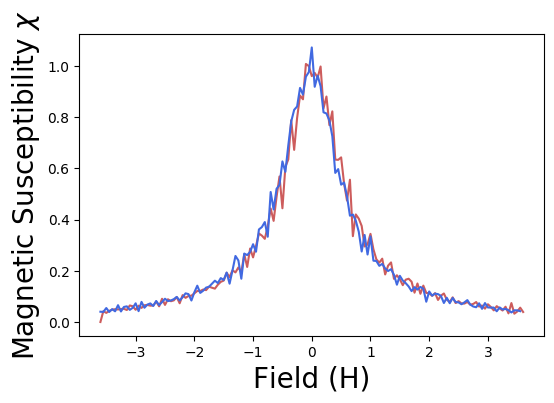

In [19]:
dMdH3 = find_Der(mAvgVal, Hvals)
plt.plot(H_up3, dMdH3[0:int(nn/2)], c= 'IndianRed')
plt.plot(H_dn3, dMdH3[int(nn/2)+1:nn], c = 'RoyalBlue')
plt.xlabel("Field (H)", fontsize=20)
plt.ylabel("Magnetic Susceptibility $\chi$", fontsize=20)
plt.savefig("paperdata/L_20_ChivH_T>Tc.pdf")
plt.show()

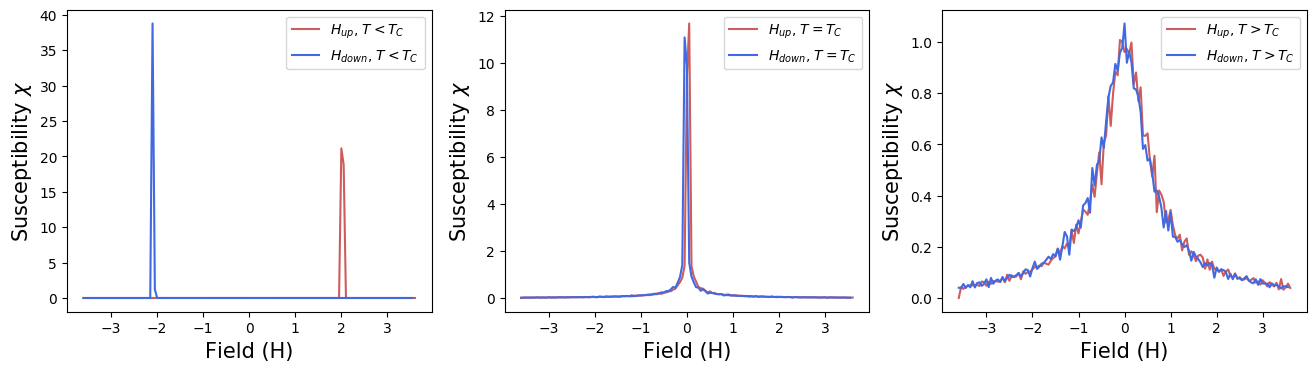

In [41]:
f = plt.figure(figsize=(16, 4)); # plot the calculated values    

sp =  f.add_subplot(1, 3, 1 );
plt.plot(H_up1, dMdH1[0:int(nn/2)], c= 'IndianRed', label="$H_{up}$, $T<T_C$")
plt.plot(H_dn1, dMdH1[int(nn/2)+1:nn], c = 'RoyalBlue', label="$H_{down}$, $T<T_C$")
plt.xlabel("Field (H)", fontsize=15)
plt.ylabel("Susceptibility $\chi$", fontsize=15)
plt.legend()
plt.axis('tight');


sp =  f.add_subplot(1, 3, 2 );
plt.plot(H_up2, dMdH2[0:int(nn/2)], c= 'IndianRed', label="$H_{up}$, $T=T_C$")
plt.plot(H_dn2, dMdH2[int(nn/2)+1:nn], c = 'RoyalBlue', label="$H_{down}$, $T=T_C$")
plt.xlabel("Field (H)", fontsize=15)
plt.ylabel("Susceptibility $\chi$", fontsize=15)
plt.legend()
plt.axis('tight');


sp =  f.add_subplot(1, 3, 3 );
plt.plot(H_up3, dMdH3[0:int(nn/2)], c= 'IndianRed', label="$H_{up}$, $T>T_C$")
plt.plot(H_dn3, dMdH3[int(nn/2)+1:nn], c = 'RoyalBlue', label="$H_{down}$, $T>T_C$")
plt.xlabel("Field (H)", fontsize=15)
plt.ylabel("Susceptibility $\chi$", fontsize=15)
plt.legend()
plt.axis('tight');

plt.savefig("paperdata/chivH.pdf")
plt.show()

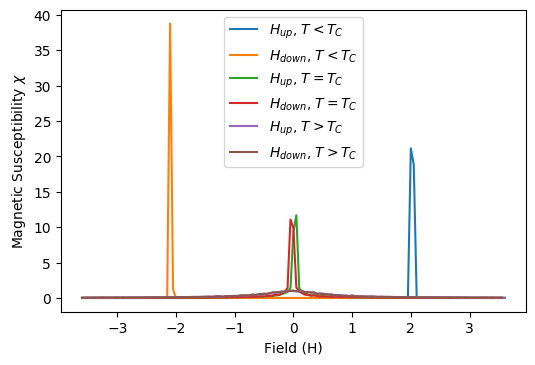

In [22]:
plt.plot(H_up1, dMdH1[0:int(nn/2)], label="$H_{up}$, $T<T_C$")
plt.plot(H_dn1, dMdH1[int(nn/2)+1:nn], label="$H_{down}$, $T<T_C$")
plt.plot(H_up2, dMdH2[0:int(nn/2)], label="$H_{up}$, $T=T_C$")
plt.plot(H_dn2, dMdH2[int(nn/2)+1:nn], label="$H_{down}$, $T=T_C$")
plt.plot(H_up3, dMdH3[0:int(nn/2)],  label = "$H_{up}$, $T>T_C$")
plt.plot(H_dn3, dMdH3[int(nn/2)+1:nn],  label="$H_{down}$, $T>T_C$")
plt.legend()
plt.xlabel("Field (H)", fontsize=10)
plt.ylabel("Magnetic Susceptibility $\chi$", fontsize=10)
# plt.savefig("paperdata/ChivH.pdf")
plt.show()